In [1]:
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Polygon
import seaborn as sns
sns.set(style="ticks")
from scipy import stats
import bokeh as bo

# Introduciton

1. <a href="#gather">Gathering Data Set</a>

2. <a href="#assess">Assessing Data Set</a>

3. <a href="#clean">Cleaning Data Set</a>

4. <a href="#analyze">Analyze Data Set</a>

5. <a href="#if">Inferential Statistics</a>

6. <a href="#findings">Main Findings</a>



# <span id="gather">Gathering Data Set</span>

Data Set available on Kaggle: <a href="https://www.kaggle.com/lava18/google-play-store-apps">Find Data Set</a>

In [2]:
df = pd.read_csv('googleplaystore.csv')
df_review = pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_review.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Variable descritions df: 
<table>
   
   <colgroup>
        <col width="100">
        <col width="200">
   </colgroup>
	
    <tr>
		<th>Variable</th>
		<th>Description</th>
	</tr>
    
	<tr>
		<td>App</td>
		<td>Application name</td>
        
	</tr>
    	</tr>
	<tr>
		<td>Category</td>
		<td>Category the app belongs to</td>
	</tr>
    
            
	</tr>
    	</tr>
	<tr>
		<td>Rating</td>
		<td>Overall user rating of the app (as when scraped)</td>
	</tr>
        
        
	<tr>
		<td>Reviews</td>
		<td>Number of user reviews for the app (as when scraped)</td>
	</tr>
        
            

	<tr>
		<td>Size</td>
		<td>Size of the app (as when scraped)</td>
	</tr>
        
            
	<tr>
		<td>Installs</td>
		<td>Number of user downloads/installs for the app (as when scraped)</td>
	</tr>
            
            
	<tr>
		<td>Type</td>
		<td>Paid or Free</td>
	</tr>
            
         
	<tr>
		<td>Price</td>
		<td>Price of the app (as when scraped)</td>
	</tr>
            

	<tr>
		<td>Content Rating</td>
		<td>Age group the app is targeted at - Children / Mature 21+ / Adult</td>
	</tr>
                
	<tr>
		<td>GenresAn</td>
		<td> app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.</td> 
	</tr>

	<tr>
		<td>Last Updated</td>
		<td>Date when the app was last updated on Play Store (as when scraped)</td>
	</tr>
                

	<tr>
		<td>Current Ver</td>
		<td>Current version of the app available on Play Store (as when scraped)</td>
	</tr>
    
    <tr>
		<td>Android Ver</td>
		<td>Min required Android version (as when scraped)</td>
	</tr>
    
</table>




### Variable descritions df_review:

<table>
   
   <colgroup>
        <col width="100">
        <col width="200">
   </colgroup>
	
    <tr>
		<th>Variable</th>
		<th>Description</th>
	</tr>
    
	<tr>
		<td>Translated_Review</td>
		<td>User review (Preprocessed and translated to English)</td>
        
	</tr>
    	</tr>
	<tr>
		<td>Sentiment</td>
		<td>Positive/Negative/Neutral (Preprocessed)</td>
	</tr>
    
    <tr>
		<td>Sentiment_Polarity</td>
		<td>Sentiment polarity score</td>
	</tr>
    
    <tr>
		<td>Sentiment_Subjectivity</td>
		<td>Sentiment subjectivity score</td>
	</tr>

</table>





<style>
table { text-align: left }
</style>

# <span id="assess">Assessing Data Set</span>

## Programmatic Assessment

In [5]:
print('df data set has ', df.shape[0], 'rows and ', df.shape[1], 'columns')

df data set has  10841 rows and  13 columns


In [6]:
print('df_review data set has ', df_review.shape[0], 'rows and ', df_review.shape[1], 'columns')

df_review data set has  64295 rows and  5 columns


In [7]:
#get class for columns
def get_class(dataframe):
    for col in list(dataframe):
        print(col, type(dataframe[col][0]))

get_class(df)

App <class 'str'>
Category <class 'str'>
Rating <class 'numpy.float64'>
Reviews <class 'str'>
Size <class 'str'>
Installs <class 'str'>
Type <class 'str'>
Price <class 'str'>
Content Rating <class 'str'>
Genres <class 'str'>
Last Updated <class 'str'>
Current Ver <class 'str'>
Android Ver <class 'str'>


In [8]:
#get class for df_review data set
#type(df_review['Translated_Review'][0])
get_class(df_review)

App <class 'str'>
Translated_Review <class 'str'>
Sentiment <class 'str'>
Sentiment_Polarity <class 'numpy.float64'>
Sentiment_Subjectivity <class 'numpy.float64'>


In [9]:
#function value counts
def get_vc(dataframe, col):
    return df[col].value_counts()
    
get_vc(df, 'Current Ver')

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     88
1.5                     81
1.0.2                   80
1.6                     65
1.0.3                   62
2.1                     61
3.0                     59
1.0.4                   58
1.7                     53
2.0.0                   51
1.0.5                   50
1.1.0                   49
1.1.1                   48
1.0.6                   47
1.2.1                   46
1.2.0                   43
1.8                     42
4.0                     40
1.9                     37
2.3.2                   35
2.4                     34
1.0.7                   34
                      ... 
1.0.56                   1
17.7.8                   1
2.8.12                   1
4.3.5                    1
1.9.3097721              1
2.4.43                   1
2

In [10]:
get_vc(df, 'Android Ver')

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
2.2 - 7.1.1              1
5.0 - 7.1.1              1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [11]:
#Checking for duplicates
print('df has', sum(df.duplicated()), 'duplicated values, while df_review has ', sum(df_review.duplicated()), 'duplicated values')

df has 483 duplicated values, while df_review has  33616 duplicated values


In [12]:
#checking out some duplicates
df_review[df_review.duplicated()][:5]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
78,10 Best Foods for You,Good,Positive,0.7,0.600000
79,10 Best Foods for You,Good,Positive,0.7,0.600000
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333


## Assessment

### Visual Assessment 
**Quality issues df:** 

- Size has "M" at the end
- Installs has "," between thousends and "+" at the end
- Genres contains multiple values
- Last Updated has text and numbers
- Android version has "and up" in text

**Quality issues df_review:** 
- No quality issues detected on visual assessment

### Programmatic Assessment

**Quality issues df:** 

- Rating, Reviews, Size, Installs, Price should be int / float
- Last Updated should be datetime format
- Check if string format in Current Ver and Android Ver is right
- Current Ver, Last updated, Android ver, Content Rating should be renamed to name_2ndname
- Current Ver should be categorical 
- Android Ver should be categorical
- Text values should be replaced with n/a in Current Ver
- Column names should all be lowercase
- df has 483 duplicated values

**Quality issues df_review:** 
- Sentiment_Polarity and Sentiment_Subjectivity should be floats
- Sentiment_Polarity and Sentiment_Subjectivity should be lowercase
- df_review has 33616 duplicated values 

**Null values will be assessed and dicussed after dropping duplicates in the <a href="#clean">Cleaning</a> part**

# <span id="clean">Cleaning Data Set</span>

**Problems targeted:**
- Current Ver, Last updated, Android ver, Content Rating should be renamed to name_2ndname
- Column names should all be lowercase
- Sentiment_Polarity and Sentiment_Subjectivity should be floats
- Sentiment_Polarity and Sentiment_Subjectivity should be lowercase


In [13]:
# lets fix the column names first
df.columns = df.columns.str.lower().str.replace(' ', '_')
df_review.columns = df_review.columns.str.lower()

#check outcome
print(df.columns, df_review.columns)

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object') Index(['app', 'translated_review', 'sentiment', 'sentiment_polarity',
       'sentiment_subjectivity'],
      dtype='object')


**Problems targeted:**

- df has 483 duplicated values
- df_review has 33616 duplicated values 

In [14]:
#Get rid of duplicates
df = df.drop_duplicates()
df_review = df_review.drop_duplicates()

#check it
#Checking for duplicates
print('df has', sum(df.duplicated()), 'duplicated values, while df_review has', sum(df_review.duplicated()), 'duplicated values')

df has 0 duplicated values, while df_review has 0 duplicated values


In [15]:
#getting null values
def get_null(dataframe):
    for col in dataframe:
        print(col, 'has', sum(dataframe[col].isnull()), 'null values')
        
get_null(df), get_null(df_review)

app has 0 null values
category has 0 null values
rating has 1465 null values
reviews has 0 null values
size has 0 null values
installs has 0 null values
type has 1 null values
price has 0 null values
content_rating has 1 null values
genres has 0 null values
last_updated has 0 null values
current_ver has 8 null values
android_ver has 3 null values
app has 0 null values
translated_review has 987 null values
sentiment has 982 null values
sentiment_polarity has 982 null values
sentiment_subjectivity has 982 null values


(None, None)

In [16]:
#Dropping all rows with null values in sentiments variables
df_review = df_review.dropna(subset=['sentiment', 'sentiment_polarity', 'sentiment_subjectivity'])

#checking outcome
get_null(df_review)

app has 0 null values
translated_review has 5 null values
sentiment has 0 null values
sentiment_polarity has 0 null values
sentiment_subjectivity has 0 null values


**Problems targeted:**

- Size has "M" at the end


In [17]:
df['size'].value_counts()[:2]

Varies with device    1526
11M                    188
Name: size, dtype: int64

In [18]:
#replacing "Varies with device" into n/a
df['size'] = df['size'].replace('Varies with device', np.NAN)

In [19]:
#removing the 'M' from the cells
df['size'] = df['size'].apply(lambda x: np.NAN if pd.isnull(x) else x.split('M')[0])


**Problems targeted:**

- Installs has "," between thousends and "+" at the end



In [20]:
df.installs.value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
Free                 1
0                    1
Name: installs, dtype: int64

In [21]:
#The value_counts show that this can be remained, free must be transformed to n/a
df['installs'] = df['installs'].apply(lambda x: np.NAN if x == "Free" else x)
df['installs'] = df['installs'].astype('category')

In [22]:
df.installs.value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: installs, dtype: int64

**Problems targeted:**
- Genres contains multiple values



In [23]:
df_genre = (df['genres'].str.split(';', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_genre.stack().value_counts()[-5:]

Creativity           37
Word                 28
Music                24
Music & Audio         1
February 11, 2018     1
dtype: int64

In [24]:
#combining some similar categories
df_genre['genres_1'] = df_genre['genres_1'].replace('Music & Audio', 'Music')
df_genre['genres_2'] = df_genre['genres_2'].replace('Music & Audio', 'Music')
df_genre['genres_1'] = df_genre['genres_1'].replace('February 11, 2018', np.NAN)
df_genre['genres_1'] = df_genre['genres_1'].replace('Educational', 'Education')
df_genre['genres_2'] = df_genre['genres_2'].replace('Educational', 'Education')

In [25]:
df_genre.genres_1.value_counts()[-5:]

Card      51
Casino    39
Trivia    39
Word      28
Music     25
Name: genres_1, dtype: int64

In [26]:
#combininng data sets
df = df.join([df_genre])
df = df.drop('genres', axis=1)


**Problems targeted:**

- Last Updated has text and numbers
- Last Updated should be datetime format

In [27]:
from datetime import datetime

In [28]:
#Try 
try:
    df['last_updated'] = df['last_updated'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
except Exception as e:
        print('not working', e)
    
#Dropping Life Made WI-Fi Touchscreen Phto Frame since many datapoints are missing
df.drop(10472, inplace=True)

try:
    df['last_updated'] = df['last_updated'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
except Exception as e:
        print('not working', e)

not working time data '1.0.19' does not match format '%B %d, %Y'


In [29]:
df.head(2)

,app,category,rating,reviews,size,installs,type,price,content_rating,last_updated,current_ver,android_ver,genres_1,genres_2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play


**Problems targeted:**
- Fix df_size formats



In [30]:
#Resetting Index
df = df.reset_index(drop=True)

#checking if some 0 are contained in df
df.query('size=="0"')

#Replacing float np.NAN with string 0
df['size'].replace(np.NAN, '0', inplace=True)

#removing the "k" at the end of a number
df['size'] = df['size'].apply(lambda x: x.split('k')[0] if x[-1]=='k' else x)

#transform the 0 again 
df['size'].replace('0', np.NAN, inplace=True)



**Problems targeted:**
- Fix df_size formats

In [31]:
df['price'] = df['price'].apply(lambda x: x.split('$')[1] if x[0]=='$' else x)

**Problems targeted:**
- Rating, Reviews, Size, Installs, Price should be int / float
- Sentiment_Polarity and Sentiment_Subjectivity should be floats


In [32]:
#fixing dtype in df DataFrame
df['rating'] = df['rating'].astype(float)
df['reviews'] = df['reviews'].astype(int)
df['size'] = df['size'].astype(float)
df['price'] = df['price'].astype(float)
df['genres_2'] = df['genres_2'].astype(str)

#fixing dtype in df_review DataFrame
df_review['sentiment_polarity'] = df_review['sentiment_polarity'].astype(float)
df_review['sentiment_subjectivity'] = df_review['sentiment_subjectivity'].astype(float)

**Problems targeted:**
- Android version has "and up" in text
- Check if string format in Current Ver and Android Ver is right

In [33]:
df['android_ver'] = df['android_ver'].astype('category')

#seems ok

In [34]:
get_class(df), get_class(df_review)

app <class 'str'>
category <class 'str'>
rating <class 'numpy.float64'>
reviews <class 'numpy.int64'>
size <class 'numpy.float64'>
installs <class 'str'>
type <class 'str'>
price <class 'numpy.float64'>
content_rating <class 'str'>
last_updated <class 'pandas._libs.tslibs.timestamps.Timestamp'>
current_ver <class 'str'>
android_ver <class 'str'>
genres_1 <class 'str'>
genres_2 <class 'str'>
app <class 'str'>
translated_review <class 'str'>
sentiment <class 'str'>
sentiment_polarity <class 'numpy.float64'>
sentiment_subjectivity <class 'numpy.float64'>


(None, None)

### The following issues occured during the Data Analysis

**Problem targeted:**

- Delete duplicated apps and keep those with most reviews (most current one probably)

In [35]:
#rows to remove
rows_to_remove = []

#takes all rows with more than 1 app in value count, sorts it by reviews (largest review number is kept)
#and adds their index to rows_to_remove
for ind in df['app'].value_counts()[:523].index:
    rows_to_remove.append(df[df['app']==ind].sort_values(by='reviews').index[:-1].tolist())

#https://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python
#makes a single list out of list of lists
flat_list = []
for sublist in rows_to_remove:
    for item in sublist:
        flat_list.append(item)

In [36]:
#https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe
#keeps the desired rows and drops the unwanted rows
indexes_to_keep = set(range(df.shape[0])) - set(flat_list)
df = df.take(list(indexes_to_keep))


In [37]:
df.to_csv('df_clean.csv')
df_review.to_csv('df_review_clean.csv')

# <span id="analyze">Analyze Data Set</span>

## EDA

### Univariate Plots

In [38]:
#Analyze numeric variables in df
df.describe()

,rating,reviews,size,price
count,8196.000000,9.659000e+03,8431.000000,9659.000000
mean,4.173267,2.168041e+05,37.138857,1.097231
std,0.536253,1.831430e+06,102.420382,16.851618
min,1.000000,0.000000e+00,1.000000,0.000000
25%,4.000000,2.500000e+01,5.300000,0.000000
50%,4.300000,9.690000e+02,14.000000,0.000000
75%,4.500000,2.945350e+04,32.000000,0.000000
max,5.000000,7.815831e+07,1020.000000,400.000000


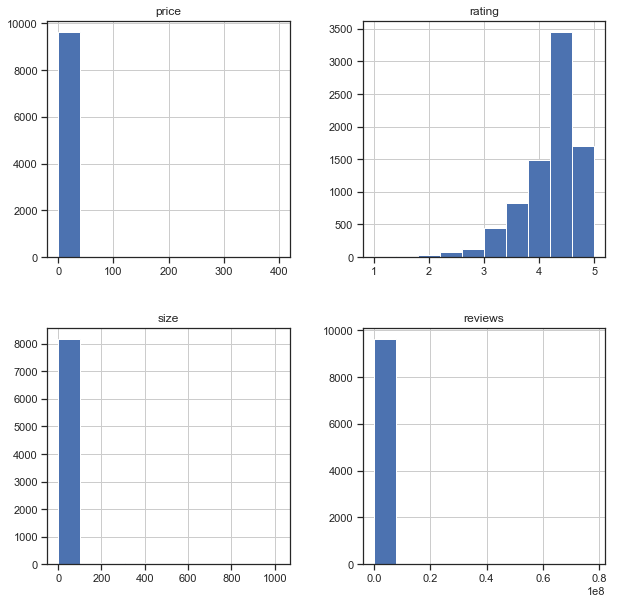

In [156]:
#Analyze numeric variables in df
#df.hist(figsize=(10,10));

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10)) # create 2x2 array of subplots

df.hist(column='price', ax=axes[0,0]) # add boxplot to 1st subplot
df.hist(column='rating', ax=axes[0,1])
df.hist(column='size', ax=axes[1,0])
df.hist(column='reviews', ax=axes[1,1], bins= 10)

plt.show()



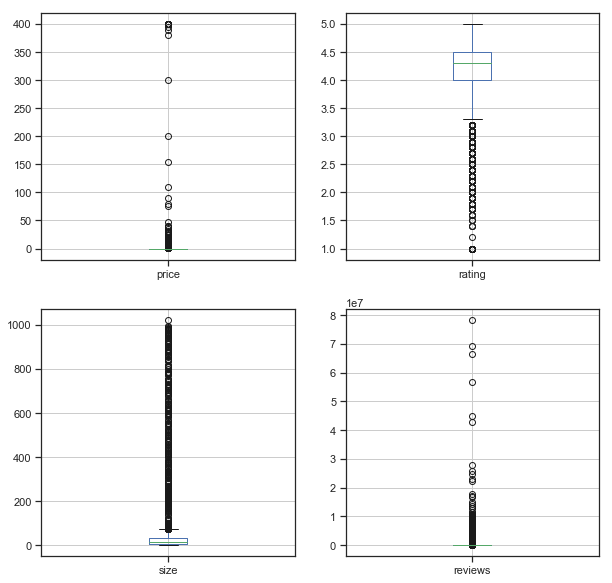

In [40]:
#Having the boxplot view
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10)) # create 2x2 array of subplots

df.boxplot(column='price', ax=axes[0,0]) # add boxplot to 1st subplot
df.boxplot(column='rating', ax=axes[0,1])
df.boxplot(column='size', ax=axes[1,0])
df.boxplot(column='reviews', ax=axes[1,1])
plt.show()

**Thoughts:**

- The size variable seems very widely distributed, both the histogramm and the boxplot are indicating this fact. It is also underlined by the large standard deviatio of 102.420382.

- Reviews are also widely distributed, while there are apps with 0 reviews, there are others with almost 80 million reviews. While 50% of the data has lower or equal to 969 reviews, 7% of the data has lower or equal to 29'453 reviews.  The data has a huge standard deviation of 

-

In [155]:
df.query('reviews==0')

,app,category,rating,reviews,size,installs,type,price,content_rating,last_updated,current_ver,android_ver,genres_1,genres_2
431,Truth or Dare Pro,DATING,NaN,0,20.0,50+,Paid,1.49,Teen,2017-09-01,1.0,4.0 and up,Dating,None
432,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,18.0,100+,Paid,2.99,Everyone,2017-07-25,1.0.1,4.0 and up,Dating,None
555,Dating White Girls,DATING,NaN,0,3.6,50+,Free,0.00,Mature 17+,2018-07-20,1.0,4.0 and up,Dating,None
557,Geeks Dating,DATING,NaN,0,13.0,50+,Free,0.00,Mature 17+,2018-07-10,1.0,4.1 and up,Dating,None
561,CAM5678 Video Chat,DATING,NaN,0,39.0,500+,Free,0.00,Mature 17+,2018-07-13,5.5.8,4.0.3 and up,Dating,None
562,Video chat live advices,DATING,NaN,0,8.0,100+,Free,0.00,Everyone,2018-07-10,1.0,3.0 and up,Dating,None
564,Pet Lovers Dating,DATING,NaN,0,14.0,10+,Free,0.00,Mature 17+,2018-07-09,1.0,4.1 and up,Dating,None
566,Latin Dating,DATING,NaN,0,13.0,10+,Free,0.00,Mature 17+,2018-07-09,1.0,4.1 and up,Dating,None
569,Wifi Mingle,DATING,NaN,0,10.0,10+,Free,0.00,Everyone,2018-07-27,1.3,4.4 and up,Dating,None
573,HOW TO ASK A GIRL OUT,DATING,NaN,0,19.0,10+,Free,0.00,Everyone,2018-07-16,1.0,4.0.3 and up,Dating,None


In [41]:
#Analyze numeric variables in df_review
df_review.describe()


,sentiment_polarity,sentiment_subjectivity
count,29697.000000,29697.000000
mean,0.188836,0.490848
std,0.355672,0.266029
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422500,0.652500
max,1.000000,1.000000


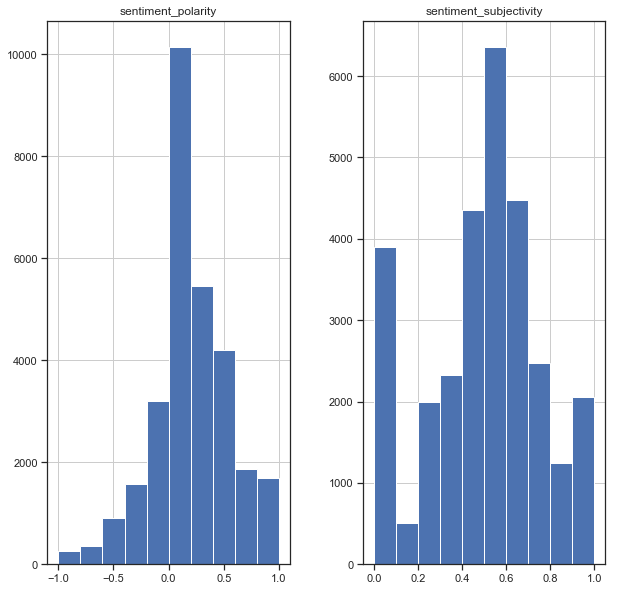

In [42]:
#Analyze numeric variables in df_review
df_review.hist(figsize=(10,10));

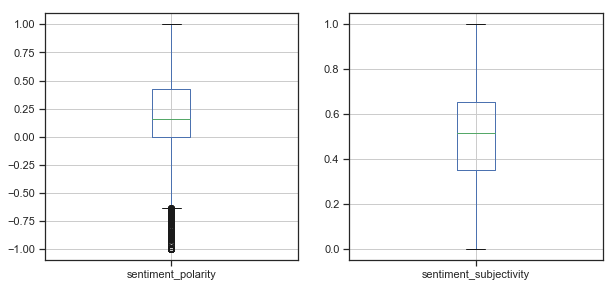

In [137]:
# Having the boxplot view
plt.figure(1, figsize=(10,10))

plt.subplot(221)
df_review.boxplot(column='sentiment_polarity')# add boxplot to 1st subplot

plt.subplot(222)
df_review.boxplot(column='sentiment_subjectivity')

plt.show();


### Explorting the Category variable

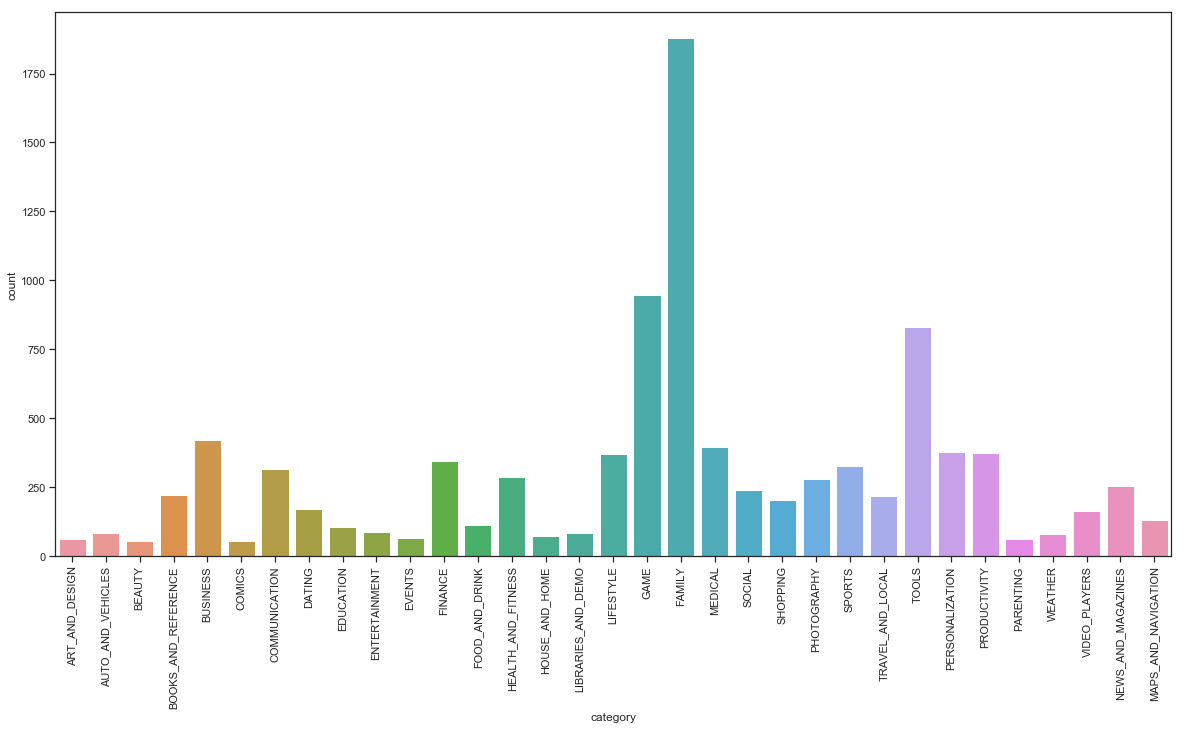

In [138]:
plt.figure(figsize=(20,10))
sns.countplot(x="category", data=df)
plt.xticks(rotation=90)
plt.show();

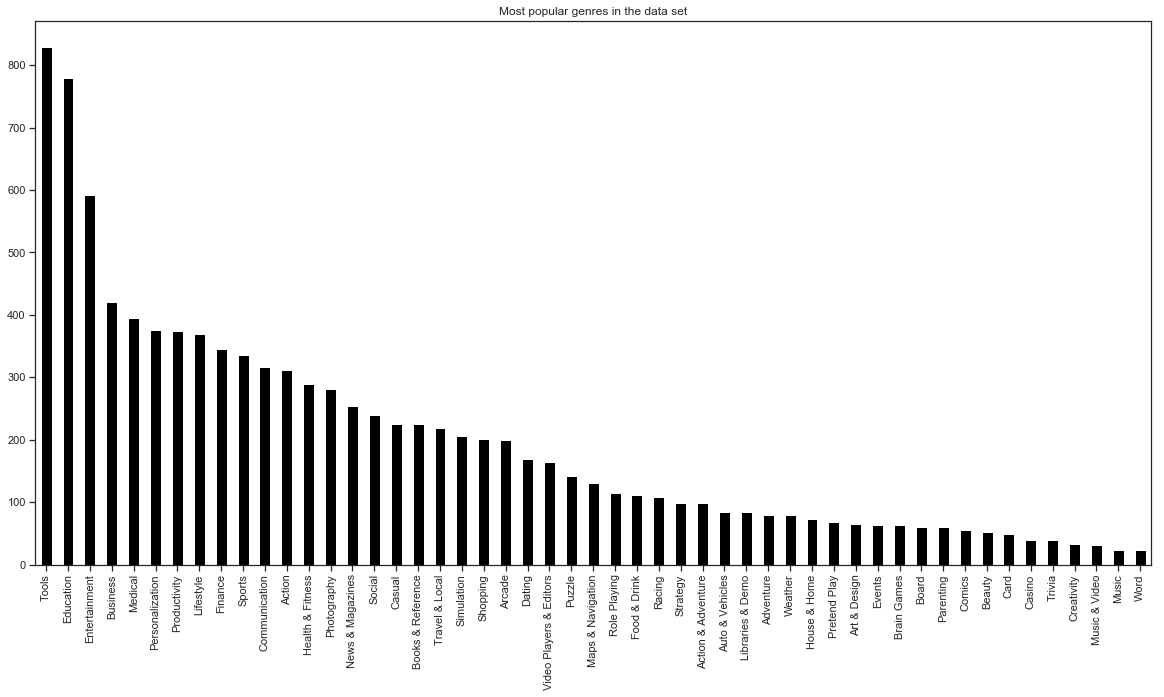

In [139]:
plt.figure(figsize=(20,10))

df[['genres_1', 'genres_2']].stack().value_counts()[1:].plot.bar(color='black');
plt.title('Most popular genres in the data set');
plt.show();

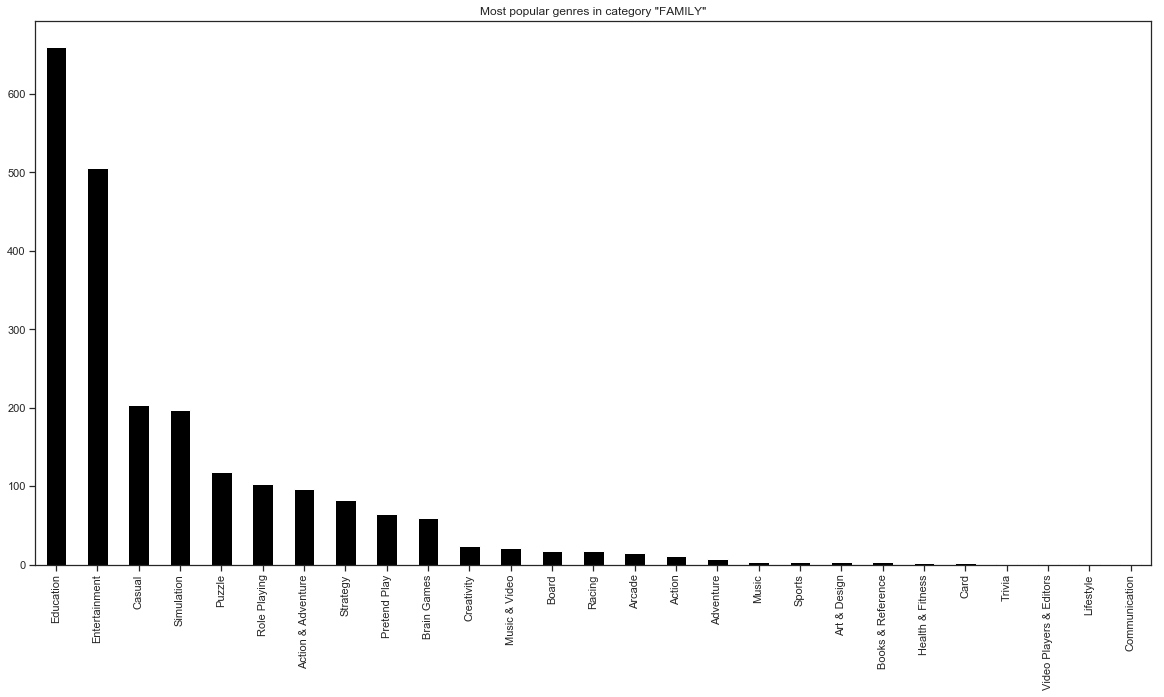

In [140]:
plt.figure(figsize=(20,10))

df.query('category=="FAMILY"')[['genres_1', 'genres_2']].stack().value_counts()[1:].plot.bar(color='black');
plt.title('Most popular genres in category "FAMILY"')
    
plt.show();

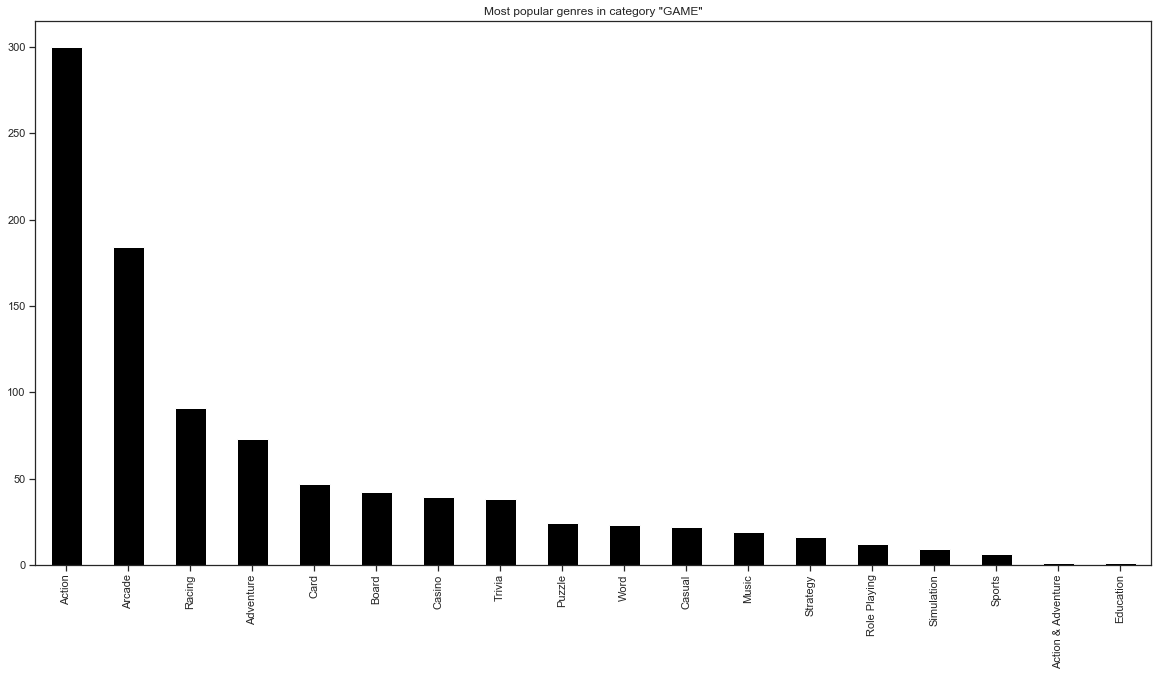

In [142]:
plt.figure(figsize=(20,10))

df.query('category=="GAME"')[['genres_1', 'genres_2']].stack().value_counts()[1:].plot.bar(color='black');
plt.title('Most popular genres in category "GAME"')
    
plt.show();

In [93]:
df.head(1)

,app,category,rating,reviews,size,installs,type,price,content_rating,last_updated,current_ver,android_ver,genres_1,genres_2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None


# <span id="if">Inferential Satistics</span>

# <span id="findings">Main Findings</span>